In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sympy import  cosh,log

#definição do tempo
t=np.arange(0,61,1)

Problema cap 2
1. Um carro A segue numa estrada à velocidade constante de 70 km/h onde o limite de 
velocidade é de 40 km/h. Ao passar por um carro patrulha, este último parte em sua 
perseguição à aceleração constante de 2,0 m/s2. 



a) Faça o gráfico da lei do movimento do carro A e do carro patrulha.

Carro em velocidade constante, ou seja, a acelaração é nula, movimento uniforme;
x(t)=x(0)+Vx(0)t
xo=0
Vx(0)=70KM/H
acelaração é igual a 0.


Carro da patrulha 
x(t)=x(0)+Vx(0)t+1/2at**2
acelaração é 2







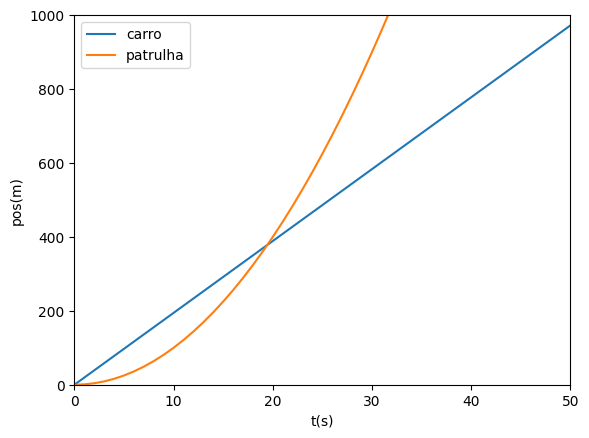

In [9]:

#equacao de movimento do carro

vx=70 #km/h
vx=70000/3600 #m/s

x=vx*t
plt.plot(t,x,label="carro")

#equacao de movimento do carro de patrulha

x_p=(1/2)*2*t**2
plt.plot(t,x_p,label="patrulha")

plt.xlabel("t(s)")
plt.ylabel("pos(m)")
plt.legend()
plt.xlim([0,50]) #limites
plt.ylim([0,1000])
plt.show()

b) Em que instante e qual a distância percorrida pelo carro patrulha quando este último 
alcança o carro em infração?


Hipotese1-Incremento linearmente o tempo e comprando ambas as posições


In [10]:
for t in range(0,21):
    print(t,19.44*t,(1/2)*2*t**2)
    if(19.44*t<(1/2)*2*t**2): #quando a curva está a baix
        print("Encontraram-se quando alcançaram os {:.2f} segundos\n".format(t))
        break
print("Percorreu",19.44*t,"metros")

0 0.0 0.0
1 19.44 1.0
2 38.88 4.0
3 58.32000000000001 9.0
4 77.76 16.0
5 97.2 25.0
6 116.64000000000001 36.0
7 136.08 49.0
8 155.52 64.0
9 174.96 81.0
10 194.4 100.0
11 213.84 121.0
12 233.28000000000003 144.0
13 252.72000000000003 169.0
14 272.16 196.0
15 291.6 225.0
16 311.04 256.0
17 330.48 289.0
18 349.92 324.0
19 369.36 361.0
20 388.8 400.0
Encontraram-se quando alcançaram os 20.00 segundos

Percorreu 388.8 metros


Hipotese2-Fazendo cálculo simbólico com o sympy

In [11]:
t,x,x_p,xo,vo,a =sy.symbols("t,x,x_p,xo,vo,a ")

x=xo+vo*t
x_p=xo+vo*t+(0.5)*a*t**2

print("x= ",x)
print("x_p= ",x_p)


x=x.subs([(xo,0),(vo,70000/3600)])
x_p=x_p.subs([(xo,0),(vo,0),(a,2)]) #substituir na expressão por valores usamos.subs lista de tupos

tfinal=sy.nsolve(x-x_p,t,20) # x-x_p resolvendo em ordem a t e valor estimado de 0, ou seja, x=x_p ou x-x_p=0 t=19.44
print('\n\ntfinal= ',tfinal,'s')

x_final=x.subs([(t,tfinal)])
print("O carro de patrulha percorreu",x_final,"metros")

x_lam= sy.lambdify(t,x,'numpy') # lambdificar ,ou seja, x(t)
x_final=x_lam(tfinal)
print(x_final)




x=  t*vo + xo
x_p=  0.5*a*t**2 + t*vo + xo


tfinal=  19.4444444444444 s
O carro de patrulha percorreu 378.086419753086 metros
378.086419753086


Problema cap 2


2. Um volante de badmington foi largado de uma altura considerável. A lei do movimento é .. em que a terminal do volante vT é 6.80 m/s


a) Faça o gráfico da lei do movimento y(t) de 0 a 4.0 s

b) Determine a velocidade instantânea em função do tempo, usando cálculo simbólico. Faça o gráfico da 
velocidade em função do tempo de 0 a 4 s, usando o pacote matplotlib

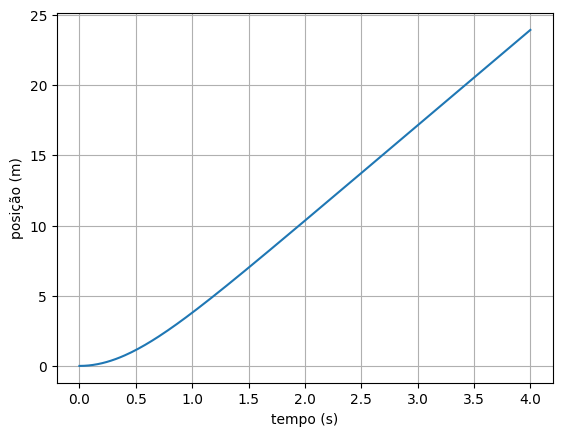

In [12]:
y, vt, g, t = sy.symbols("y, vt, g, t")
y = (vt**2)/g * sy.log(sy.cosh(g*t/vt))

#a) gráfico lei do movimento de 0 a 4s
y = y.subs([(vt, 6.80), (g, 9.81)])
yplot = sy.lambdify(t, y,"numpy")

#tempo
t = np.linspace(0, 4, 200)

plt.plot(t, yplot(t))
plt.xlabel("tempo (s)")
plt.ylabel("posição (m)")
plt.grid()
plt.show()

c) Determine a aceleração instantânea em função do tempo, usando cálculo simbólico. Faça o gráfico da aceleração 
em função do tempo de 0 a 4 s, usando o pacote matplotlib

y=	 4.71355759429154*log(cosh(1.44264705882353*t))
v_i=	 6.8*sinh(1.44264705882353*t)/cosh(1.44264705882353*t)
a_i=	 -9.81*sinh(1.44264705882353*t)**2/cosh(1.44264705882353*t)**2 + 9.81
aii=	 -9.81*sinh(1.44264705882353*t)**2/cosh(1.44264705882353*t)**2 + 9.81
aiii=	 0


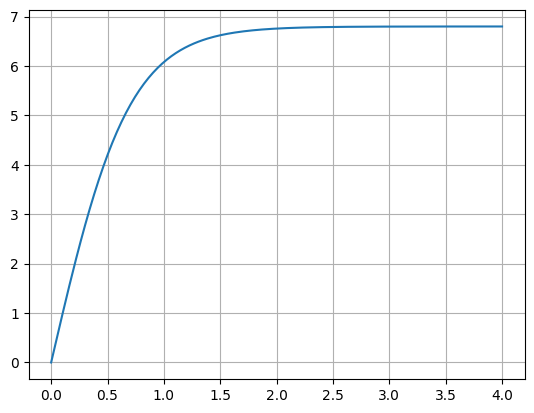

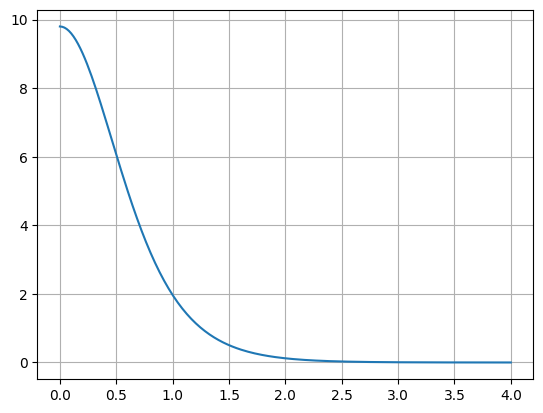

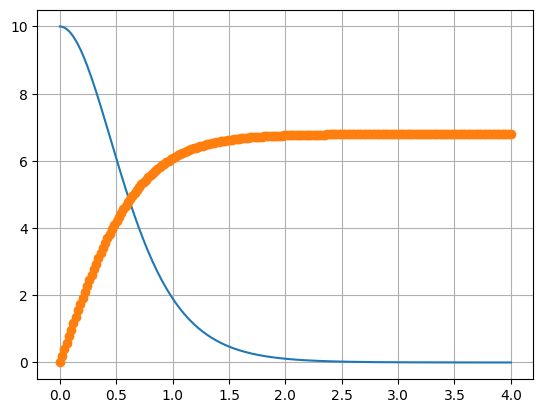

In [15]:
v_i,a_i,a,aii,aiii,t = sy.symbols("v_i,a_i,a,aii,aiii,t")

v_i=sy.diff(y,t) #derivar as posições origina velocidades e velocidade origina acelaração
a_i=sy.diff(v_i,t)

a=g-(g/(vt**2))*vt**2


print('y=\t',y)
print('v_i=\t',v_i)
print('a_i=\t',a_i)

aii=a_i.subs([(g,9.8),(vt,6.80)])
aiii=a.subs([(g,9.8),(vt,6.80)])

print('aii=\t',aii)
print('aiii=\t',aiii)

tempo = np. linspace(0, 4, 200)
funcao = 6.8*np. tanh(9.8*tempo/6.8)
plt.plot (tempo, funcao)
plt.grid()
plt.show()



formula = 9.8/np. cosh (9.8*tempo/6.8)**2

plt.plot(tempo, formula)
plt.grid()
plt.show()


expression = 10 - 10 / 6.8 ** 2 * \
(6.8*np.tanh(10*tempo/6.8))*(6.8*np.tanh(10*tempo/6.8))

plt.plot (tempo, expression)
plt.plot (tempo, funcao,"o")
plt.grid()
plt.show ()






d) Mostre que a aceleração

In [20]:

import sympy as sym
vT,g,t=sym.symbols("vT,g,t")

d = sym. Derivative((vT**2)/g * sym. log(sym. cosh (g*t/vT)), t, evaluate=True)
d_simp = sym. simplify(d)


d2 = sym. Derivative(d_simp, t, evaluate=True)
d2_simp = sym.simplify (d2)

print ("V(t) = ", d_simp)
print ("a(t) = ", d2_simp)

y0 = 20
g1= 9.8
vT1 = 6.80
t1 = np.arccosh(10**(y0*g1/vT1 **2)) *vT1/g1
v = vT1*np.tanh (g1*t1/vT1)
a = g1/np.cosh(g1*t1/vT1)**2

print("Velocidade:",v, "m/s.")
print ("Aceleração:",a,"m/s^2.")


V(t) =  vT*tanh(g*t/vT)
a(t) =  g/cosh(g*t/vT)**2
Velocidade: 6.799999988676771 m/s.
Aceleração: 3.2637540607096826e-08 m/s^2.


e) Se o volante for largado de uma altura de 20 m, quanto tempo demora a atingir o solo? Compare com o tempo 
que demoraria se não houvesse resistência do ar


In [21]:
y0 = 20
g = 9.8
VT = 6.8

t = (np. arccosh(10** (y0*g/VT**2))) *VT/g
print("O tempo com a resitência é: ", t)
ts = np.sqrt((2*y0)/g)

print("O tempo sem resistencia é: ",ts)

O tempo com a resitência é:  7.253268364607231
O tempo sem resistencia é:  2.0203050891044216
